In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [ ]:
app_df=pd.read_csv("/content/application_data.csv")

In [ ]:
app_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [ ]:
app_df.shape

(49999, 122)

In [ ]:
app_df.tail()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
49994,157871,0,Cash loans,F,N,N,0,180000.0,1206000.0,45936.0,1206000.0,NaN,Working,Higher education,Single / not married,House / apartment,0.035792,-10667,-285,-2521,-3333,NaN,1,1,0,1,0,0,Waiters/barmen staff,1.0,2,2,WEDNESDAY,11,0,0,0,0,1,1,Restaurant,0.426359,0.493770,0.634706,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-14.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
49995,157872,0,Cash loans,M,N,N,0,126000.0,1125000.0,47794.5,1125000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.015221,-20211,-4651,-11281,-3722,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,TUESDAY,10,0,0,0,0,0,0,Construction,0.465596,0.722218,0.454321,0.0041,0.0000,0.9702,0.592,0.0,0.0,0.0000,0.0000,0.0417,0.0237,0.0034,0.0022,0.0,0.0000,0.0042,0.0000,0.9702,0.608,0.0,0.0,0.0000,0.0000,0.0417,0.0242,0.0037,0.0022,0.0,0.0000,0.0042,0.0000,0.9702,0.5975,0.0,0.0,0.0000,0.0000,0.0417,0.0241,0.0034,0.0022,0.0,0.0000,reg oper account,block of flats,0.0017,Block,No,1.0,0.0,1.0,0.0,-1930.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
49996,157873,0,Cash loans,M,N,N,1,112500.0,900000.0,26316.0,900000.0,Unaccompanied,Working,Secondary / secondary special,Married,With parents,0.025164,-10280,-1158,-8620,-2604,NaN,1,1,0,1,0,1,NaN,3.0,2,2,MONDAY,9,0,0,0,0,0,0,Business Entity Type 1,0.439635,0.296144,0.579727,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-712.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0


In [ ]:
app_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49999 entries, 0 to 49998
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DAYS

In [ ]:
app_df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,49999.000000,49999.000000,49999.000000,4.999900e+04,4.999900e+04,49998.000000,4.996100e+04,49999.000000,49999.000000,49999.000000,49999.000000,49999.000000,17049.000000,49999.000000,49999.000000,49999.000000,49999.00000,49999.000000,49999.000000,49998.000000,49999.000000,49999.000000,49999.000000,49999.000000,49999.000000,49999.000000,49999.000000,49999.000000,49999.000000,21827.000000,4.987300e+04,40055.000000,24614.000000,20800.000000,25605.000000,16760.000000,15039.000000,23348.000000,24804.000000,25124.000000,16105.000000,20278.000000,15773.000000,24862.000000,15285.000000,22427.000000,24614.000000,20800.000000,25605.000000,16760.000000,15039.000000,23348.000000,24804.000000,25124.000000,16105.000000,20278.000000,15773.000000,24862.000000,15285.000000,22427.000000,24614.000000,20800.000000,25605.000000,16760.000000,15039.000000,23348.000000,24804.000000,25124.000000,16105.000000,20278.000000,15773.000000,24862.000000,15285.000000,22427.000000,25851.000000,49831.000000,49831.000000,49831.000000,49831.000000,49998.000000,49999.000000,49999.000000,49999.000000,49999.000000,49999.000000,49999.000000,49999.000000,49999.000000,49999.000000,49999.000000,49999.0,49999.000000,49999.000000,49999.000000,49999.000000,49999.000000,49999.000000,49999.000000,49999.000000,49999.00000,43265.000000,43265.000000,43265.000000,43265.000000,43265.000000,43265.000000
mean,129013.210584,0.080522,0.419848,1.707676e+05,5.997006e+05,27107.377355,5.390600e+05,0.020798,-16022.042081,63219.424488,-4977.282666,-2996.797176,12.025749,0.999980,0.821476,0.199264,0.99798,0.277726,0.055661,2.158946,2.051661,2.030721,12.052561,0.015000,0.049921,0.039641,0.079962,0.232165,0.179704,0.502257,5.138236e-01,0.511881,0.117771,0.088946,0.978036,0.751639,0.044796,0.078678,0.150551,0.225467,0.231650,0.066352,0.100436,0.107690,0.009097,0.028294,0.114444,0.088012,0.977404,0.758967,0.042663,0.074157,0.145999,0.221489,0.228260,0.064843,0.105323,0.106110,0.008224,0.027114,0.118203,0.088526,0.978031,0.754952,0.044708,0.077838,0.150037,0.225081,0.231559,0.067107,0.101737,0.108830,0.008939,

In [ ]:
round(app_df.isnull().sum()/app_df.shape[0]*100,2).sort_values(ascending=False)

COMMONAREA_MEDI                 69.92
COMMONAREA_AVG                  69.92
COMMONAREA_MODE                 69.92
NONLIVINGAPARTMENTS_MODE        69.43
NONLIVINGAPARTMENTS_AVG         69.43
NONLIVINGAPARTMENTS_MEDI        69.43
LIVINGAPARTMENTS_MODE           68.45
LIVINGAPARTMENTS_AVG            68.45
LIVINGAPARTMENTS_MEDI           68.45
FONDKAPREMONT_MODE              68.38
FLOORSMIN_AVG                   67.79
FLOORSMIN_MODE                  67.79
FLOORSMIN_MEDI                  67.79
YEARS_BUILD_MEDI                66.48
YEARS_BUILD_MODE                66.48
YEARS_BUILD_AVG                 66.48
OWN_CAR_AGE                     65.90
LANDAREA_MEDI                   59.44
LANDAREA_MODE                   59.44
LANDAREA_AVG                    59.44
BASEMENTAREA_MEDI               58.40
BASEMENTAREA_AVG                58.40
BASEMENTAREA_MODE               58.40
EXT_SOURCE_1                    56.35
NONLIVINGAREA_MODE              55.15
NONLIVINGAREA_AVG               55.15
NONLIVINGARE

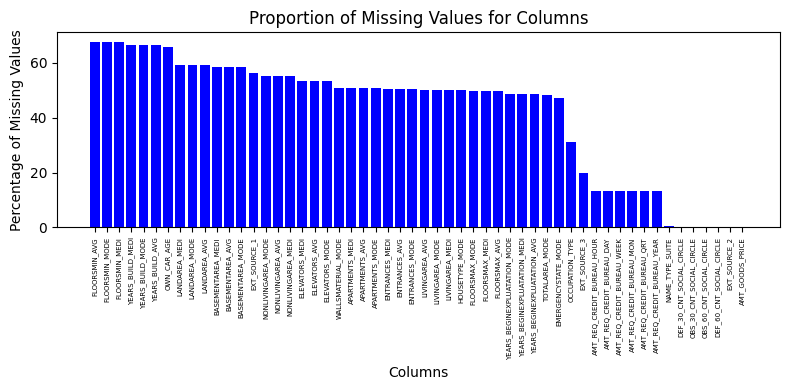

In [ ]:
columns_to_visualize = ['FLOORSMIN_AVG','FLOORSMIN_MODE','FLOORSMIN_MEDI','YEARS_BUILD_MEDI',
              'YEARS_BUILD_MODE','YEARS_BUILD_AVG','OWN_CAR_AGE','LANDAREA_MEDI',
              'LANDAREA_MODE','LANDAREA_AVG', 'BASEMENTAREA_MEDI','BASEMENTAREA_AVG',
              'BASEMENTAREA_MODE','EXT_SOURCE_1','NONLIVINGAREA_MODE','NONLIVINGAREA_AVG',
              'NONLIVINGAREA_MEDI','ELEVATORS_MEDI','ELEVATORS_AVG','ELEVATORS_MODE',
              'WALLSMATERIAL_MODE','APARTMENTS_MEDI','APARTMENTS_AVG','APARTMENTS_MODE',
              'ENTRANCES_MEDI','ENTRANCES_AVG','ENTRANCES_MODE', 'LIVINGAREA_AVG',
              'LIVINGAREA_MODE', 'LIVINGAREA_MEDI',
              'HOUSETYPE_MODE','FLOORSMAX_MODE','FLOORSMAX_MEDI','FLOORSMAX_AVG',
              'YEARS_BEGINEXPLUATATION_MODE','YEARS_BEGINEXPLUATATION_MEDI',
              'YEARS_BEGINEXPLUATATION_AVG','TOTALAREA_MODE','EMERGENCYSTATE_MODE',
              'OCCUPATION_TYPE','EXT_SOURCE_3','AMT_REQ_CREDIT_BUREAU_HOUR',
              'AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK',
              'AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT',
              'AMT_REQ_CREDIT_BUREAU_YEAR','NAME_TYPE_SUITE','DEF_30_CNT_SOCIAL_CIRCLE',
              'OBS_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
              'DEF_60_CNT_SOCIAL_CIRCLE', 'EXT_SOURCE_2', 'AMT_GOODS_PRICE']
# Calculate the proportion of missing values for the selected columns
missing_proportion = (app_df[columns_to_visualize].isnull().sum() / len(app_df)) * 100

# Create a bar chart to visualize missing value proportions for selected columns
plt.figure(figsize=(8, 4))
plt.bar(missing_proportion.index, missing_proportion, color='blue')
plt.xlabel('Columns')
plt.ylabel('Percentage of Missing Values')
plt.title('Proportion of Missing Values for Columns')
plt.xticks(size=5,rotation=90)
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
thresh=len(app_df)*0.45
columns_to_drop = app_df.columns[app_df.isnull().sum() >=thresh]
app_df.drop(columns=columns_to_drop, inplace=True)

In [ ]:
print("Shape of Application_Data after dropping null columns:",app_df.shape)

Shape of Application_Data after dropping null columns: (49999, 73)


In [ ]:
#Convert negative days columns into positive days
days_columns = ['DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH']
for col in days_columns:
    app_df[col] = app_df[col].abs()

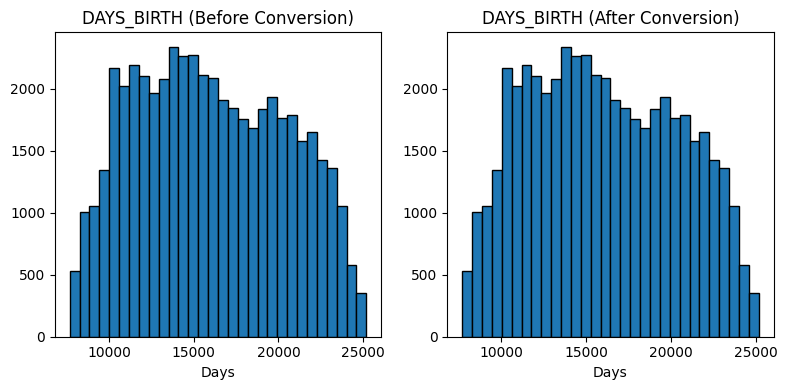

In [ ]:
# Before converting to positive days
plt.figure(figsize=(8,4))
plt.subplot(1, 2, 1)
plt.hist(app_df['DAYS_BIRTH'], bins=30, edgecolor='k')
plt.title('DAYS_BIRTH (Before Conversion)')
plt.xlabel('Days')
# Convert to positive days
app_df['DAYS_BIRTH'] = app_df['DAYS_BIRTH'].abs()
# After converting to positive days
plt.subplot(1, 2, 2)
plt.hist(app_df['DAYS_BIRTH'], bins=30, edgecolor='k')
plt.title('DAYS_BIRTH (After Conversion)')
plt.xlabel('Days')
plt.tight_layout()
plt.show()

In [ ]:
round(app_df.isnull().sum()/app_df.shape[0]*100,2).sort_values(ascending=False)

OCCUPATION_TYPE                31.31
EXT_SOURCE_3                   19.89
AMT_REQ_CREDIT_BUREAU_YEAR     13.47
AMT_REQ_CREDIT_BUREAU_QRT      13.47
AMT_REQ_CREDIT_BUREAU_MON      13.47
AMT_REQ_CREDIT_BUREAU_WEEK     13.47
AMT_REQ_CREDIT_BUREAU_DAY      13.47
AMT_REQ_CREDIT_BUREAU_HOUR     13.47
NAME_TYPE_SUITE                 0.38
OBS_30_CNT_SOCIAL_CIRCLE        0.34
DEF_30_CNT_SOCIAL_CIRCLE        0.34
OBS_60_CNT_SOCIAL_CIRCLE        0.34
DEF_60_CNT_SOCIAL_CIRCLE        0.34
EXT_SOURCE_2                    0.25
AMT_GOODS_PRICE                 0.08
FLAG_DOCUMENT_7                 0.00
DAYS_LAST_PHONE_CHANGE          0.00
FLAG_DOCUMENT_2                 0.00
FLAG_DOCUMENT_3                 0.00
FLAG_DOCUMENT_4                 0.00
FLAG_DOCUMENT_5                 0.00
FLAG_DOCUMENT_6                 0.00
FLAG_DOCUMENT_11                0.00
FLAG_DOCUMENT_8                 0.00
FLAG_DOCUMENT_9                 0.00
FLAG_DOCUMENT_10                0.00
LIVE_CITY_NOT_WORK_CITY         0.00
F

In [ ]:
app_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648,2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186,291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260,2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,3039,9833,2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,3038,4311,3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


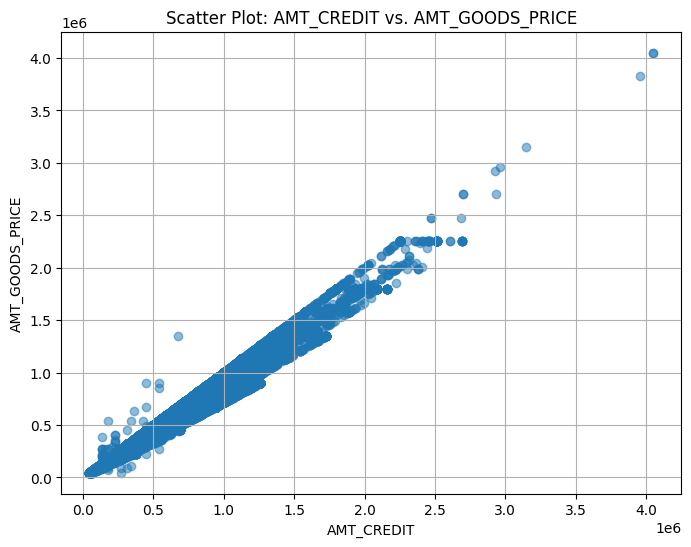

In [ ]:
# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(app_df['AMT_CREDIT'], app_df['AMT_GOODS_PRICE'], alpha=0.5)
plt.xlabel('AMT_CREDIT')
plt.ylabel('AMT_GOODS_PRICE')
plt.title('Scatter Plot: AMT_CREDIT vs. AMT_GOODS_PRICE')
plt.grid(True)
plt.show()

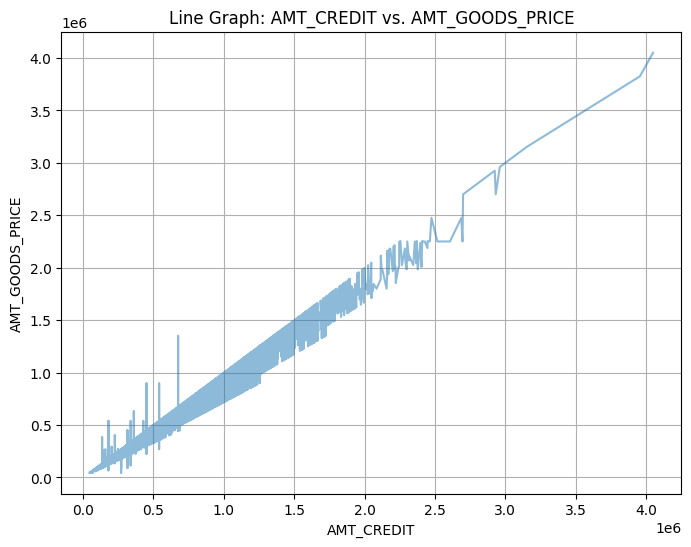

In [ ]:
app_df_sorted = app_df.sort_values(by='AMT_CREDIT')

plt.figure(figsize=(8, 6))
plt.plot(app_df_sorted['AMT_CREDIT'], app_df_sorted['AMT_GOODS_PRICE'], alpha=0.5)
plt.xlabel('AMT_CREDIT')
plt.ylabel('AMT_GOODS_PRICE')
plt.title('Line Graph: AMT_CREDIT vs. AMT_GOODS_PRICE')
plt.grid(True)
plt.show()

In [ ]:
app_df["OCCUPATION_TYPE"].isnull().sum()

15654

In [ ]:
app_df["OCCUPATION_TYPE"].replace(np.NaN,"unknown",inplace=True)

In [ ]:
app_df['NAME_TYPE_SUITE'].isnull().sum()

192

In [ ]:
app_df['NAME_TYPE_SUITE'].mode()

0    Unaccompanied
Name: NAME_TYPE_SUITE, dtype: object

In [ ]:
app_df['NAME_TYPE_SUITE'].fillna(app_df['NAME_TYPE_SUITE'].mode()[0], inplace=True)

In [ ]:
app_df['EXT_SOURCE_3'].value_counts(normalize=True)*100

EXT_SOURCE_3
0.746300    0.606666
0.713631    0.554238
0.694093    0.531769
0.670652    0.481837
0.626304    0.469355
0.673830    0.466858
0.621226    0.464362
0.643026    0.459368
0.581484    0.456872
0.652897    0.454375
0.595456    0.451879
0.681706    0.449382
0.657784    0.444389
0.511892    0.441892
0.554947    0.439396
0.656158    0.436899
0.771362    0.434403
0.689479    0.431906
0.513694    0.426913
0.651260    0.424416
0.733815    0.416927
0.709189    0.411934
0.684828    0.406940
0.706205    0.396954
0.609276    0.394458
0.579727    0.389464
0.450747    0.386968
0.576209    0.384471
0.593718    0.384471
0.728141    0.381975
0.586740    0.376982
0.832785    0.376982
0.754406    0.371989
0.740799    0.371989
0.524496    0.371989
0.607557    0.364499
0.501075    0.364499
0.000527    0.364499
0.695622    0.362002
0.553165    0.362002
0.454321    0.359506
0.647977    0.357009
0.634706    0.357009
0.591977    0.357009
0.565608    0.357009
0.417100    0.354513
0.538863    0.354513


In [ ]:
app_df['EXT_SOURCE_3'].mean()

0.5118814079192111

In [ ]:
nullcol=['EXT_SOURCE_2','EXT_SOURCE_3']
for column in nullcol:
  app_df[column].fillna(app_df[column].mean, inplace=True)

In [ ]:
app_df['EXT_SOURCE_3'].isnull().sum()

0

In [ ]:
app_df['AMT_REQ_CREDIT_BUREAU_YEAR'].value_counts(normalize=True)*100

AMT_REQ_CREDIT_BUREAU_YEAR
0.0     27.167456
1.0     24.347625
2.0     18.627066
3.0     12.467352
4.0      7.798451
5.0      4.315266
6.0      2.574830
7.0      1.426095
8.0      0.818213
9.0      0.399861
11.0     0.018491
10.0     0.009245
12.0     0.009245
13.0     0.004623
16.0     0.004623
15.0     0.004623
25.0     0.002311
23.0     0.002311
14.0     0.002311
Name: proportion, dtype: float64

In [ ]:
app_df['AMT_REQ_CREDIT_BUREAU_QRT'].value_counts(normalize=True)*100

AMT_REQ_CREDIT_BUREAU_QRT
0.0    81.199584
1.0    12.601410
2.0     5.371547
3.0     0.621750
4.0     0.171039
5.0     0.018491
6.0     0.006934
8.0     0.004623
7.0     0.004623
Name: proportion, dtype: float64

In [ ]:
app_df['AMT_REQ_CREDIT_BUREAU_MON'].value_counts(normalize=True)*100

AMT_REQ_CREDIT_BUREAU_MON
0.0     83.497053
1.0     12.411880
2.0      2.073269
3.0      0.788166
4.0      0.416041
5.0      0.224200
7.0      0.122501
6.0      0.113256
8.0      0.085519
9.0      0.073963
11.0     0.055472
10.0     0.043915
12.0     0.025425
16.0     0.023113
13.0     0.013868
14.0     0.009245
15.0     0.009245
17.0     0.006934
19.0     0.004623
24.0     0.002311
Name: proportion, dtype: float64

In [ ]:
app_df['AMT_REQ_CREDIT_BUREAU_WEEK'].value_counts(normalize=True)*100

AMT_REQ_CREDIT_BUREAU_WEEK
0.0    96.962903
1.0     2.909973
2.0     0.083208
3.0     0.023113
4.0     0.013868
5.0     0.004623
6.0     0.002311
Name: proportion, dtype: float64

In [ ]:
app_df['AMT_REQ_CREDIT_BUREAU_DAY'].value_counts(normalize=True)*100

AMT_REQ_CREDIT_BUREAU_DAY
0.0    99.371316
1.0     0.559344
2.0     0.039293
3.0     0.016179
4.0     0.006934
5.0     0.004623
6.0     0.002311
Name: proportion, dtype: float64

In [ ]:
app_df['AMT_REQ_CREDIT_BUREAU_HOUR'].value_counts(normalize=True)*100

AMT_REQ_CREDIT_BUREAU_HOUR
0.0    99.318156
1.0     0.658731
2.0     0.018491
3.0     0.004623
Name: proportion, dtype: float64

In [ ]:
nullcols=['AMT_REQ_CREDIT_BUREAU_YEAR','AMT_REQ_CREDIT_BUREAU_QRT',
          'AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_WEEK',
          'AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_HOUR']
for col in nullcols:
   app_df[col].fillna(app_df[col].mode()[0], inplace=True)

In [ ]:
app_df['AMT_REQ_CREDIT_BUREAU_HOUR'].isnull().sum()

0

In [ ]:
app_df['OBS_30_CNT_SOCIAL_CIRCLE'].value_counts(normalize=True)*100

OBS_30_CNT_SOCIAL_CIRCLE
0.0     53.308182
1.0     15.867633
2.0      9.921535
3.0      6.734764
4.0      4.651723
5.0      3.046296
6.0      2.079027
7.0      1.364612
8.0      1.023459
9.0      0.666252
10.0     0.469587
11.0     0.280950
12.0     0.196665
13.0     0.128434
14.0     0.072244
15.0     0.052176
16.0     0.048163
17.0     0.026088
19.0     0.014047
22.0     0.010034
20.0     0.010034
18.0     0.010034
21.0     0.008027
25.0     0.002007
24.0     0.002007
23.0     0.002007
28.0     0.002007
26.0     0.002007
Name: proportion, dtype: float64

In [ ]:
app_df['DEF_30_CNT_SOCIAL_CIRCLE'].value_counts(normalize=True)*100

DEF_30_CNT_SOCIAL_CIRCLE
0.0    88.677731
1.0     9.058618
2.0     1.804098
3.0     0.347173
4.0     0.090305
5.0     0.020068
6.0     0.002007
Name: proportion, dtype: float64

In [ ]:
app_df['OBS_60_CNT_SOCIAL_CIRCLE'].value_counts(normalize=True)*100

OBS_60_CNT_SOCIAL_CIRCLE
0.0     53.579097
1.0     15.887700
2.0      9.879392
3.0      6.696635
4.0      4.597540
5.0      3.006161
6.0      2.077020
7.0      1.354578
8.0      0.969276
9.0      0.660232
10.0     0.451526
11.0     0.282956
12.0     0.178604
13.0     0.122414
14.0     0.072244
15.0     0.054183
16.0     0.052176
17.0     0.020068
19.0     0.016054
20.0     0.012041
21.0     0.008027
22.0     0.006020
18.0     0.006020
25.0     0.004014
24.0     0.002007
23.0     0.002007
28.0     0.002007
Name: proportion, dtype: float64

In [ ]:
app_df['DEF_60_CNT_SOCIAL_CIRCLE'].value_counts(normalize=True)*100

DEF_60_CNT_SOCIAL_CIRCLE
0.0    91.756136
1.0     6.937449
2.0     1.089683
3.0     0.160543
4.0     0.046156
5.0     0.010034
Name: proportion, dtype: float64

In [ ]:
nullcols=['OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE',
          'OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE']
for col in nullcols:
   app_df[col].fillna(app_df[col].median(), inplace=True)

In [ ]:
app_df.dropna(subset=['AMT_GOODS_PRICE'], inplace=True)

In [ ]:
app_df.shape

(6479, 122)

In [ ]:
print("Shape of Application_data after imputation and dropping:",app_df.shape)

Shape of Application_data after imputation and dropping: (6479, 122)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [ ]:
prev_df=pd.read_csv("/content/previous_application.csv")

In [ ]:
round(app_df.isnull().sum()/app_df.shape[0]*100,2).sort_values(ascending=False)

COMMONAREA_MEDI                 69.92
COMMONAREA_AVG                  69.92
COMMONAREA_MODE                 69.92
NONLIVINGAPARTMENTS_MODE        69.43
NONLIVINGAPARTMENTS_AVG         69.43
NONLIVINGAPARTMENTS_MEDI        69.43
LIVINGAPARTMENTS_MODE           68.45
LIVINGAPARTMENTS_AVG            68.45
LIVINGAPARTMENTS_MEDI           68.45
FONDKAPREMONT_MODE              68.38
FLOORSMIN_AVG                   67.79
FLOORSMIN_MODE                  67.79
FLOORSMIN_MEDI                  67.79
YEARS_BUILD_MEDI                66.48
YEARS_BUILD_MODE                66.48
YEARS_BUILD_AVG                 66.48
OWN_CAR_AGE                     65.90
LANDAREA_MEDI                   59.44
LANDAREA_MODE                   59.44
LANDAREA_AVG                    59.44
BASEMENTAREA_MEDI               58.40
BASEMENTAREA_AVG                58.40
BASEMENTAREA_MODE               58.40
EXT_SOURCE_1                    56.35
NONLIVINGAREA_MODE              55.15
NONLIVINGAREA_AVG               55.15
NONLIVINGARE

In [ ]:
prev_df.shape

(49999, 37)

In [ ]:
prev_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49999 entries, 0 to 49998
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   SK_ID_PREV                   49999 non-null  int64  
 1   SK_ID_CURR                   49999 non-null  int64  
 2   NAME_CONTRACT_TYPE           49999 non-null  object 
 3   AMT_ANNUITY                  39407 non-null  float64
 4   AMT_APPLICATION              49999 non-null  float64
 5   AMT_CREDIT                   49999 non-null  float64
 6   AMT_DOWN_PAYMENT             24801 non-null  float64
 7   AMT_GOODS_PRICE              39255 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   49999 non-null  object 
 9   HOUR_APPR_PROCESS_START      49999 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  49999 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       49999 non-null  int64  
 12  RATE_DOWN_PAYMENT            24801 non-null  float64
 13  RATE_INTEREST_PR

In [ ]:
prev_df.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,4.999900e+04,49999.000000,39407.000000,4.999900e+04,4.999900e+04,2.480100e+04,3.925500e+04,49999.000000,49999.000000,24801.000000,165.000000,165.000000,49999.000000,4.999900e+04,39407.000000,30839.000000,30839.000000,30839.000000,30839.000000,30839.000000,30839.000000
mean,1.922254e+06,278983.187604,15482.596847,1.688925e+05,1.885429e+05,6.557571e+03,2.151414e+05,12.478330,0.996500,0.079083,0.194799,0.787674,-900.112622,4.016558e+02,15.555891,344485.142806,14217.240150,31528.148611,76724.982101,81666.162586,0.322352
std,5.351980e+05,102780.124434,14530.971854,2.822035e+05,3.084736e+05,1.744458e+04,3.024993e+05,3.333012,0.059058,0.107658,0.088866,0.091985,786.531303,1.793772e+04,13.985174,84683.650627,73348.984383,103691.881189,149757.893750,153101.159809,0.467384
min,1.000001e+06,100007.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.059135,0.424419,-2922.000000,-1.000000e+00,0.000000,-2910.000000,-2891.000000,-2800.000000,-2850.000000,-2844.000000,0.000000
25%,1.457920e+06,189919.500000,6122.835000,2.204550e+04,2.605500e+04,0.000000e+00,4.941000e+04,10.000000,1.000000,0.000000,0.160716,0.715645,-1335.000000,-1.000000e+00,6.000000,365243.000000,-1642.000000,-1270.000000,-1337.000000,-1293.000000,0.000000
50%,1.920889e+06,279264.000000,10879.920000,7.155000e+04,7.890750e+04,1.566000e+03,1.040175e+05,12.000000,1.000000,0.049732,0.189136,0.835095,-599.000000,1.000000e+01,12.000000,365243.000000,-822.000000,-366.000000,-536.000000,-500.000000,0.000000
75%,2.388632e+06,368527.500000,19669.140000,1.800000e+05,1.981058e+05,7.875000e+03,2.250000e+05,15.000000,1.000000,0.108909,0.193330,0.852537,-292.000000,1.000000e+02,18.000000,365243.000000,-404.000000,113.000000,-71.000000,-45.000000,1.000000
max,2.845367e+06,456254.000000,234478.395000,3.826372e+06,4.104351e+06,1.035000e+06,3.826372e+06,23.000000,1.000000,0.944776,0.696178,0.867336,-2.000000,4.000000e+06,60.000000,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


In [ ]:
round(prev_df.isnull().sum()/prev_df.shape[0]*100,2).sort_values(ascending=False)

RATE_INTEREST_PRIVILEGED       99.67
RATE_INTEREST_PRIMARY          99.67
RATE_DOWN_PAYMENT              50.40
AMT_DOWN_PAYMENT               50.40
NAME_TYPE_SUITE                48.49
NFLAG_INSURED_ON_APPROVAL      38.32
DAYS_FIRST_DRAWING             38.32
DAYS_FIRST_DUE                 38.32
DAYS_LAST_DUE_1ST_VERSION      38.32
DAYS_LAST_DUE                  38.32
DAYS_TERMINATION               38.32
AMT_GOODS_PRICE                21.49
AMT_ANNUITY                    21.18
CNT_PAYMENT                    21.18
PRODUCT_COMBINATION             0.02
CHANNEL_TYPE                    0.00
NAME_PRODUCT_TYPE               0.00
NAME_YIELD_GROUP                0.00
SELLERPLACE_AREA                0.00
NAME_SELLER_INDUSTRY            0.00
NAME_GOODS_CATEGORY             0.00
NAME_PORTFOLIO                  0.00
SK_ID_PREV                      0.00
NAME_CLIENT_TYPE                0.00
CODE_REJECT_REASON              0.00
SK_ID_CURR                      0.00
DAYS_DECISION                   0.00
N

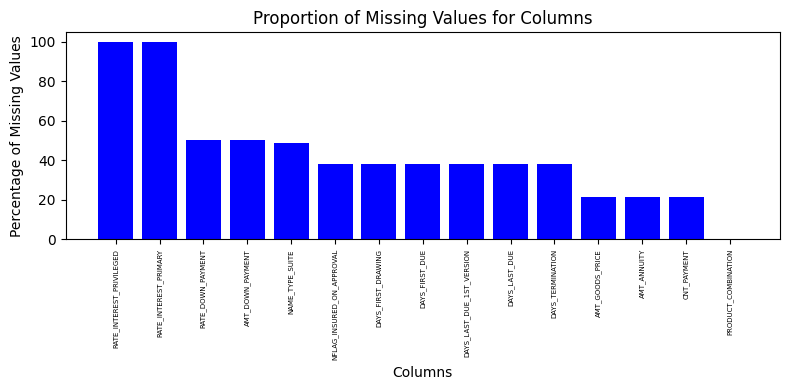

In [ ]:
columns_to_visualize = ['RATE_INTEREST_PRIVILEGED','RATE_INTEREST_PRIMARY',
                        'RATE_DOWN_PAYMENT','AMT_DOWN_PAYMENT','NAME_TYPE_SUITE',
                        'NFLAG_INSURED_ON_APPROVAL','DAYS_FIRST_DRAWING','DAYS_FIRST_DUE',
                        'DAYS_LAST_DUE_1ST_VERSION','DAYS_LAST_DUE','DAYS_TERMINATION',
                        'AMT_GOODS_PRICE','AMT_ANNUITY','CNT_PAYMENT',
                        'PRODUCT_COMBINATION']
# Calculate the proportion of missing values for the selected columns
missing_proportion = (prev_df[columns_to_visualize].isnull().sum() / len(prev_df)) * 100

# Create a bar chart to visualize missing value proportions for selected columns
plt.figure(figsize=(8,4))
plt.bar(missing_proportion.index, missing_proportion, color='blue')
plt.xlabel('Columns')
plt.ylabel('Percentage of Missing Values')
plt.title('Proportion of Missing Values for Columns')
plt.xticks(size=5,rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
thresh=len(prev_df)*0.45
columns_to_drop = prev_df.columns[prev_df.isnull().sum() >=thresh]
prev_df.drop(columns=columns_to_drop, inplace=True)

In [ ]:
print("Shape of Previous_Application after dropping null columns:", prev_df.shape)

Shape of Previous_Application after dropping null columns: (49999, 32)


In [ ]:
round(prev_df.isnull().sum()/prev_df.shape[0]*100,2).sort_values(ascending=False)

NFLAG_INSURED_ON_APPROVAL      38.32
DAYS_LAST_DUE                  38.32
DAYS_FIRST_DUE                 38.32
DAYS_LAST_DUE_1ST_VERSION      38.32
DAYS_FIRST_DRAWING             38.32
DAYS_TERMINATION               38.32
AMT_GOODS_PRICE                21.49
AMT_ANNUITY                    21.18
CNT_PAYMENT                    21.18
PRODUCT_COMBINATION             0.02
NAME_GOODS_CATEGORY             0.00
NAME_YIELD_GROUP                0.00
NAME_SELLER_INDUSTRY            0.00
SELLERPLACE_AREA                0.00
CHANNEL_TYPE                    0.00
NAME_PRODUCT_TYPE               0.00
NAME_PORTFOLIO                  0.00
SK_ID_PREV                      0.00
SK_ID_CURR                      0.00
CODE_REJECT_REASON              0.00
NAME_PAYMENT_TYPE               0.00
DAYS_DECISION                   0.00
NAME_CONTRACT_STATUS            0.00
NAME_CASH_LOAN_PURPOSE          0.00
NFLAG_LAST_APPL_IN_DAY          0.00
FLAG_LAST_APPL_PER_CONTRACT     0.00
HOUR_APPR_PROCESS_START         0.00
W

In [ ]:
prev_df.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,SATURDAY,15,Y,1,XAP,Approved,-73,Cash through the bank,XAP,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,THURSDAY,11,Y,1,XNA,Approved,-164,XNA,XAP,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,TUESDAY,11,Y,1,XNA,Approved,-301,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,MONDAY,7,Y,1,XNA,Approved,-512,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,THURSDAY,9,Y,1,Repairs,Refused,-781,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
prev_df['DAYS_TERMINATION'].value_counts(normalize=True)*100

DAYS_TERMINATION
 365243.0    22.568825
-145.0        0.119978
-269.0        0.110250
-50.0         0.107007
-373.0        0.103765
-86.0         0.100522
-359.0        0.100522
-157.0        0.097279
-246.0        0.097279
-263.0        0.097279
-240.0        0.097279
-304.0        0.097279
-166.0        0.097279
-172.0        0.097279
-131.0        0.094037
-214.0        0.094037
-339.0        0.094037
-190.0        0.094037
-108.0        0.094037
-177.0        0.094037
-109.0        0.090794
-464.0        0.090794
-257.0        0.090794
-51.0         0.090794
-235.0        0.090794
-243.0        0.090794
-44.0         0.090794
-180.0        0.090794
-278.0        0.087551
-156.0        0.087551
-142.0        0.087551
-114.0        0.087551
-218.0        0.087551
-155.0        0.087551
-151.0        0.084309
-368.0        0.084309
-110.0        0.084309
-271.0        0.084309
-192.0        0.084309
-135.0        0.084309
-319.0        0.084309
-247.0        0.081066
-163.0        0.0

In [ ]:
nullcols=['NFLAG_INSURED_ON_APPROVAL','DAYS_LAST_DUE','DAYS_FIRST_DUE',
          'DAYS_LAST_DUE_1ST_VERSION','DAYS_FIRST_DRAWING','DAYS_TERMINATION']
for col in nullcols:
   prev_df[col].fillna(prev_df[col].mode()[0], inplace=True)

In [ ]:
nullcolumns=['AMT_GOODS_PRICE','AMT_ANNUITY','CNT_PAYMENT']
for i in nullcolumns:
   prev_df[i].fillna(prev_df[i].mean(), inplace=True)

In [ ]:
prev_df.dropna(subset=['PRODUCT_COMBINATION'], inplace=True)

In [ ]:
print("Shape of Previous_application after imputation and dropping:",prev_df.shape)

Shape of Previous_application after imputation and dropping: (49991, 32)


Project 6 Task B Identify Outliers in the Dataset

In [ ]:
# Select two numerical columns for the scatter plot
x = app_df['AMT_INCOME_TOTAL']
y =app_df['AMT_CREDIT']

# Calculate the IQR (Interquartile Range) for both columns
Q1_x = x.quantile(0.25)
Q3_x = x.quantile(0.75)
IQR_x = Q3_x - Q1_x

Q1_y = y.quantile(0.25)
Q3_y = y.quantile(0.75)
IQR_y = Q3_y - Q1_y

# Define a threshold for identifying outliers (e.g., 1.5 times the IQR)
outlier_threshold_x = 1.5 * IQR_x
outlier_threshold_y = 1.5 * IQR_y

# Identify outliers for both columns
outliers_x = (x < Q1_x - outlier_threshold_x) | (x > Q3_x + outlier_threshold_x)
outliers_y = (y < Q1_y - outlier_threshold_y) | (y > Q3_y + outlier_threshold_y)

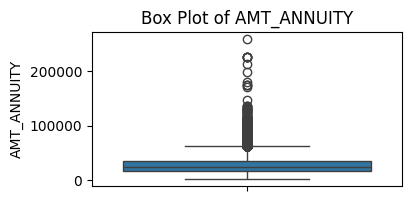

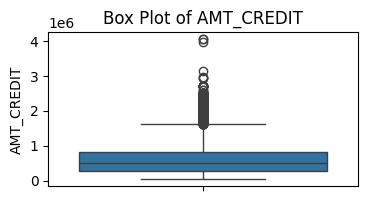

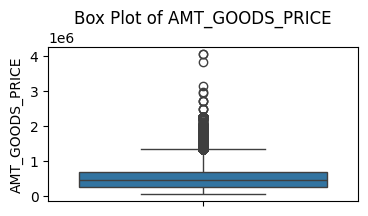

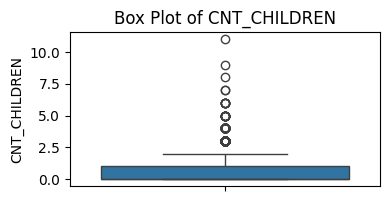

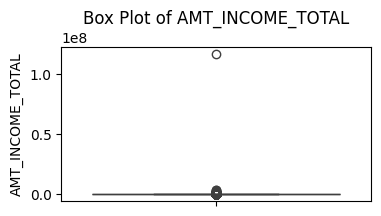

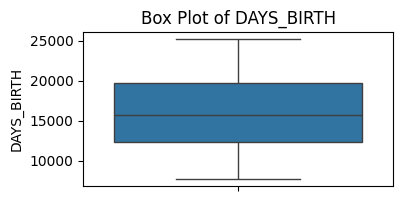

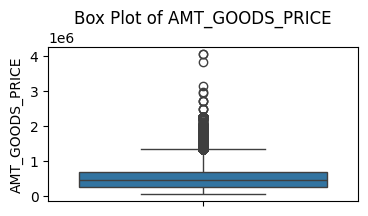

In [ ]:
# Specify the columns with potential outliers
columns_with_outliers = ['AMT_ANNUITY', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'CNT_CHILDREN','AMT_INCOME_TOTAL','DAYS_BIRTH','AMT_GOODS_PRICE']

# Create a function to visualize outliers with horizontal box plots
def visualize_outliers(data, columns):
    for column in columns:
        plt.figure(figsize=(4,2))
        sns.boxplot(y=data[column])
        plt.title(f'Box Plot of {column}')
        plt.show()

# Call the function to visualize outliers in the specified columns
visualize_outliers(app_df, columns_with_outliers)

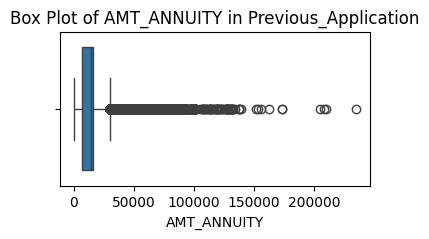

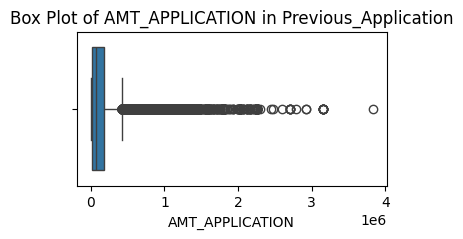

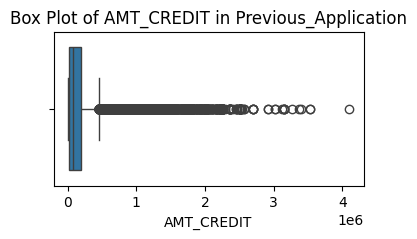

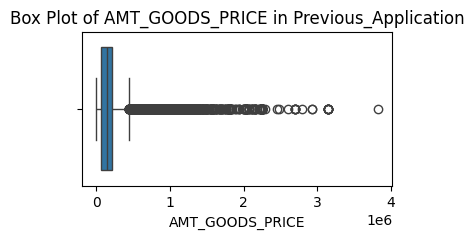

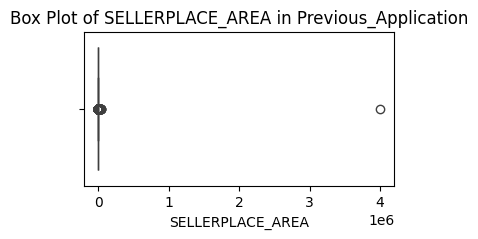

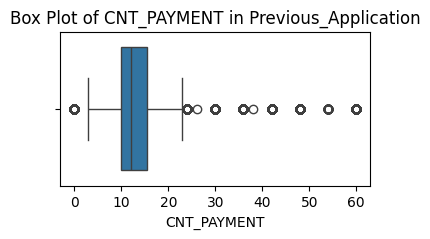

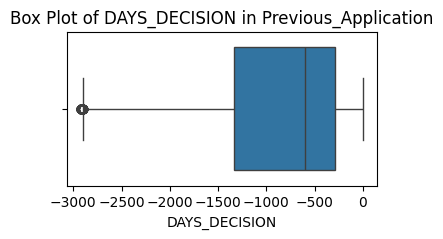

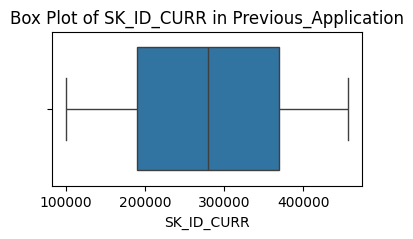

In [ ]:
# Specify the columns with potential outliers in previous_application
columns_with_outliers_prev = ['AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'SELLERPLACE_AREA', 'CNT_PAYMENT', 'DAYS_DECISION','SK_ID_CURR']

# Create a function to visualize outliers with rotated x-axis labels
def visualize_outliers_previous(data, columns):
    for column in columns:
        plt.figure(figsize=(4,2))
        sns.boxplot(x=data[column])
        plt.title(f'Box Plot of {column} in Previous_Application')
        plt.xlabel(column)

        # Rotate x-axis labels to be horizontal
        plt.xticks(rotation=0)
        plt.show()

# Call the function to visualize outliers in the specified columns with rotated labels
visualize_outliers_previous(prev_df, columns_with_outliers_prev)


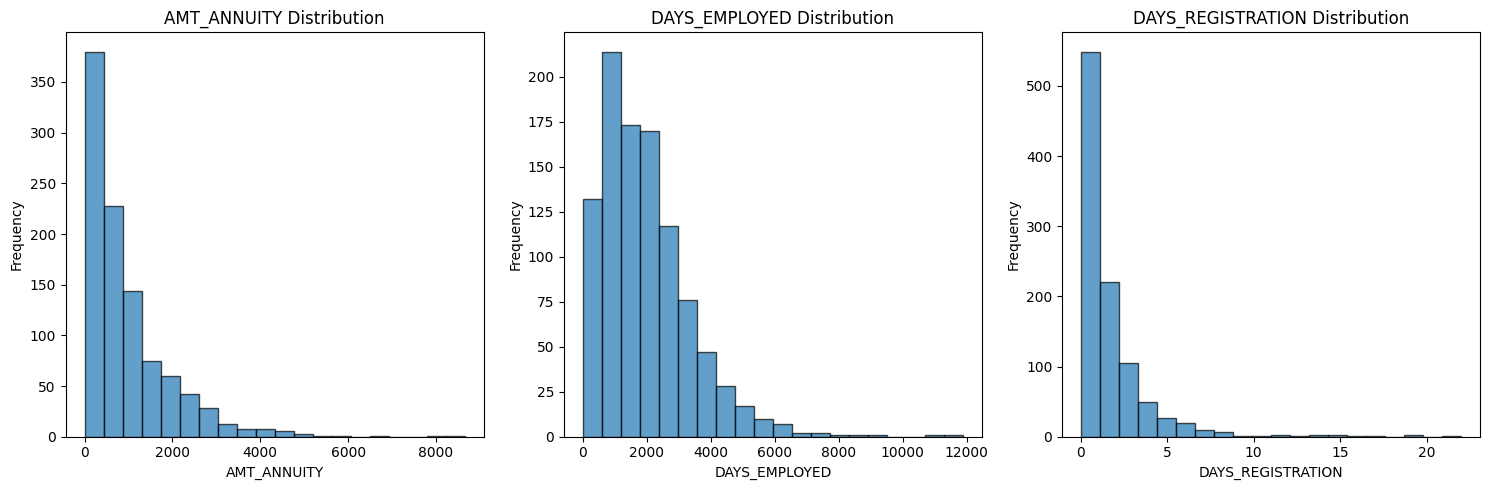

In [ ]:
# Sample data (replace this with your own data)
amt_annuity_data = np.random.exponential(scale=1000, size=1000)  # Example data with skewness
days_employed_data = np.random.gamma(shape=2, scale=1000, size=1000)  # Example data with skewness
days_registration_data = np.random.lognormal(mean=0, sigma=1, size=1000)  # Example data with skewness

# Create subplots for each variable
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Create histograms with custom bins
bins = 20  # Adjust the number of bins as needed

# Plot AMT_ANNUITY
axes[0].hist(amt_annuity_data, bins=bins, edgecolor='k', alpha=0.7)
axes[0].set_xlabel('AMT_ANNUITY')
axes[0].set_ylabel('Frequency')
axes[0].set_title('AMT_ANNUITY Distribution')

# Plot DAYS_EMPLOYED
axes[1].hist(days_employed_data, bins=bins, edgecolor='k', alpha=0.7)
axes[1].set_xlabel('DAYS_EMPLOYED')
axes[1].set_ylabel('Frequency')
axes[1].set_title('DAYS_EMPLOYED Distribution')

# Plot DAYS_REGISTRATION
axes[2].hist(days_registration_data, bins=bins, edgecolor='k', alpha=0.7)
axes[2].set_xlabel('DAYS_REGISTRATION')
axes[2].set_ylabel('Frequency')
axes[2].set_title('DAYS_REGISTRATION Distribution')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


Task C Analyze Data Imbalance

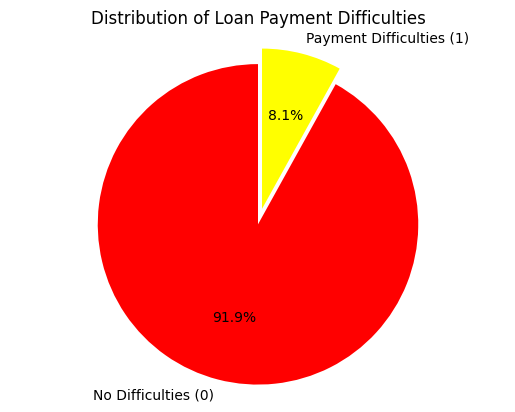

Distribution of the Target Variable:
TARGET
0    45937
1     4024
Name: count, dtype: int64

Imbalance Ratio (1s to 0s): 0.09


In [ ]:
# Assuming your target variable is named 'TARGET' (1 for payment difficulties, 0 for no difficulties)
target_variable = 'TARGET'
# Calculate the distribution of the target variable
target_distribution = app_df[target_variable].value_counts()
# Calculate the ratio of data imbalance
imbalance_ratio = target_distribution[1] / target_distribution[0]
# Create a pie chart to visualize the distribution
labels = ['No Difficulties (0)', 'Payment Difficulties (1)']
sizes = target_distribution.values
colors = ['#FF0000', '#FFFF00']  # Different colors here
explode = (0.1, 0)  # explode 1st slice (Payment Difficulties)
fig, ax = plt.subplots()
ax.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
# Display the pie chart
plt.title('Distribution of Loan Payment Difficulties')
plt.show()
# Print the distribution and imbalance ratio
print("Distribution of the Target Variable:")
print(target_distribution)
print("\nImbalance Ratio (1s to 0s): {:.2f}".format(imbalance_ratio))


In [ ]:
# Assuming your target variable is named 'TARGET' (1 for payment difficulties, 0 for no difficulties)
target_variable = 'TARGET'
# Calculate the distribution of the target variable
target_distribution = app_df[target_variable].value_counts(normalize=True) * 100
# Calculate the data imbalance percentage
defaulter_percentage = target_distribution[1]
non_defaulter_percentage = target_distribution[0]
# Print the data imbalance percentages
print("Percentage of Defaulters: {:.2f}%".format(defaulter_percentage))
print("Percentage of Non-Defaulters: {:.2f}%".format(non_defaulter_percentage))
# Verify if there is significant data imbalance
if defaulter_percentage > 60:
    print("There is a significant data imbalance where {:.2f}% of the data corresponds to Defaulters.".format(defaulter_percentage))
    print("This indicates an imbalance in the dataset.")
else:
    print("The data is relatively balanced.")

Percentage of Defaulters: 8.05%
Percentage of Non-Defaulters: 91.95%
The data is relatively balanced.


<ipython-input-80-add6860bf534>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=app_df, x='INCOME_CATEGORY', order=income_labels, palette='Set1')  # Using the 'Set3' color palette


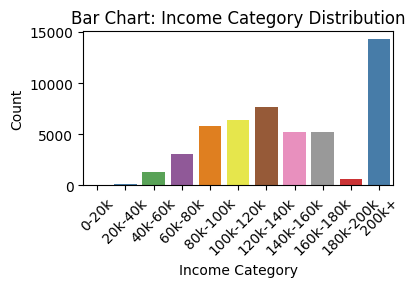

In [ ]:
# Define income categories
income_bins = [0, 20000, 40000, 60000, 80000, 100000, 120000, 140000, 160000, 180000, 200000, float('inf')]
income_labels = ['0-20k', '20k-40k', '40k-60k', '60k-80k', '80k-100k', '100k-120k', '120k-140k', '140k-160k', '160k-180k', '180k-200k', '200k+']

# Create a new categorical column for income categories
app_df['INCOME_CATEGORY'] = pd.cut(app_df['AMT_INCOME_TOTAL'], bins=income_bins, labels=income_labels)

# Create a bar chart for income categories with multiple colors
plt.figure(figsize=(4,2))
sns.countplot(data=app_df, x='INCOME_CATEGORY', order=income_labels, palette='Set1')  # Using the 'Set3' color palette
plt.xlabel('Income Category')
plt.ylabel('Count')
plt.title('Bar Chart: Income Category Distribution')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()

<ipython-input-81-1f7fcc4d32b6>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=app_df, x='CODE_GENDER', order=app_df['CODE_GENDER'].value_counts().index, palette=custom_colors)
<ipython-input-81-1f7fcc4d32b6>:5: UserWarning: 
The palette list has fewer values (2) than needed (3) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(data=app_df, x='CODE_GENDER', order=app_df['CODE_GENDER'].value_counts().index, palette=custom_colors)


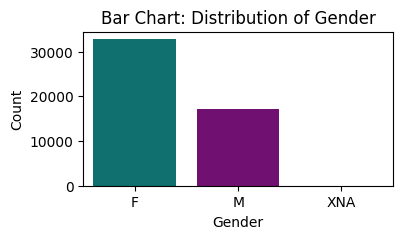

In [ ]:
# Univariate analysis of gender (CODE_GENDER)
custom_colors = ["#008080", "#800080"]  # You can add more colors if needed
# Create a bar chart for gender with custom colors
plt.figure(figsize=(4,2))
sns.countplot(data=app_df, x='CODE_GENDER', order=app_df['CODE_GENDER'].value_counts().index, palette=custom_colors)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Bar Chart: Distribution of Gender')
plt.show()


<ipython-input-82-dbe2bcf11907>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=app_df, x='FLAG_OWN_CAR', order=app_df['FLAG_OWN_CAR'].value_counts().index, palette=custom_colors)


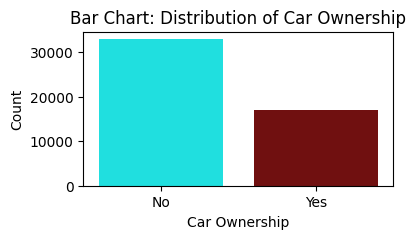

In [ ]:
# Univariate analysis of car ownership (FLAG_OWN_CAR)
# Define custom colors for car ownership categories
custom_colors = ["#00FFFF", "#800000"]  # Custom colors for 'No' and 'Yes' categories
# Create a bar chart for car ownership with custom colors
plt.figure(figsize=(4,2))
sns.countplot(data=app_df, x='FLAG_OWN_CAR', order=app_df['FLAG_OWN_CAR'].value_counts().index, palette=custom_colors)
plt.xlabel('Car Ownership')
plt.ylabel('Count')
plt.title('Bar Chart: Distribution of Car Ownership')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()


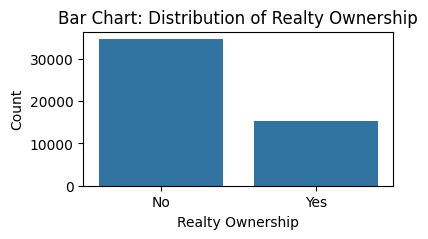

In [ ]:
# Univariate analysis of realty ownership (FLAG_OWN_REALTY)
plt.figure(figsize=(4,2))
sns.countplot(data=app_df, x='FLAG_OWN_REALTY', order=app_df['FLAG_OWN_REALTY'].value_counts().index)
plt.xlabel('Realty Ownership')
plt.ylabel('Count')
plt.title('Bar Chart: Distribution of Realty Ownership')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

<ipython-input-84-09a4e625e54c>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=app_df, x='NAME_TYPE_SUITE', palette=custom_colors)
<ipython-input-84-09a4e625e54c>:4: UserWarning: 
The palette list has fewer values (5) than needed (7) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(data=app_df, x='NAME_TYPE_SUITE', palette=custom_colors)


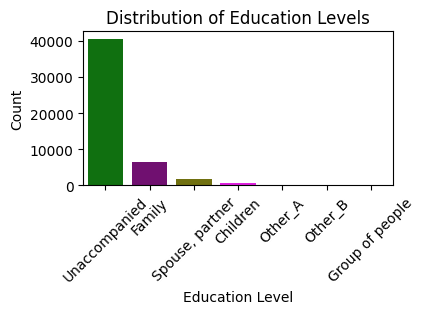

In [ ]:
custom_colors = ["#008000", "#800080", "#808000", "#FF00FF", "#7F33FF"]  # You can customize these colors as needed
# Create a bar chart for education levels with custom colors
plt.figure(figsize=(4,2))
sns.countplot(data=app_df, x='NAME_TYPE_SUITE', palette=custom_colors)
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.title('Distribution of Education Levels')
plt.xticks(rotation=45)
plt.show()

<ipython-input-85-a5a97416f48d>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=credit_stats.index, y=credit_stats.values, palette='Set3')


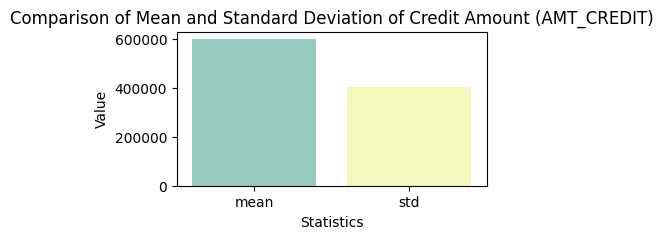

In [ ]:
# Calculate mean and standard deviation of 'AMT_CREDIT'
credit_stats = app_df['AMT_CREDIT'].agg(['mean', 'std'])
# Create a bar chart to visualize the statistics
plt.figure(figsize=(4,2))
sns.barplot(x=credit_stats.index, y=credit_stats.values, palette='Set3')
plt.xlabel('Statistics')
plt.ylabel('Value')
plt.title('Comparison of Mean and Standard Deviation of Credit Amount (AMT_CREDIT)')
plt.show()

<ipython-input-86-c436b6013875>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=app_df[app_df['TARGET'] == 1], x='OCCUPATION_TYPE', ax=axes[0], palette=colors_target_1)
<ipython-input-86-c436b6013875>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=app_df[app_df['TARGET'] == 0], x='OCCUPATION_TYPE', ax=axes[1], palette=colors_target_0)


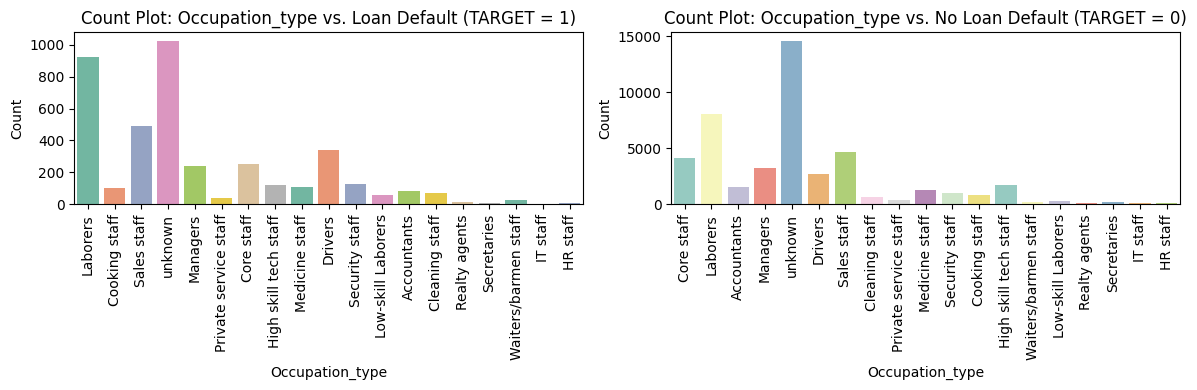

In [ ]:
# Define custom color palettes for each subplot
colors_target_1 = sns.color_palette("Set2", len(app_df[app_df['TARGET'] == 1]['OCCUPATION_TYPE'].unique()))
colors_target_0 = sns.color_palette("Set3", len(app_df[app_df['TARGET'] == 0]['OCCUPATION_TYPE'].unique()))

# Create a subplot with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Plot for 'TARGET' equal to 1 (loan default)
sns.countplot(data=app_df[app_df['TARGET'] == 1], x='OCCUPATION_TYPE', ax=axes[0], palette=colors_target_1)
axes[0].set_xlabel('Occupation_type')
axes[0].set_ylabel('Count')
axes[0].set_title('Count Plot: Occupation_type vs. Loan Default (TARGET = 1)')
axes[0].tick_params(axis='x', rotation=90)

# Plot for 'TARGET' equal to 0 (no loan default)
sns.countplot(data=app_df[app_df['TARGET'] == 0], x='OCCUPATION_TYPE', ax=axes[1], palette=colors_target_0)
axes[1].set_xlabel('Occupation_type')
axes[1].set_ylabel('Count')
axes[1].set_title('Count Plot: Occupation_type vs. No Loan Default (TARGET = 0)')
axes[1].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()


<ipython-input-87-f3d4565d6514>:18: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


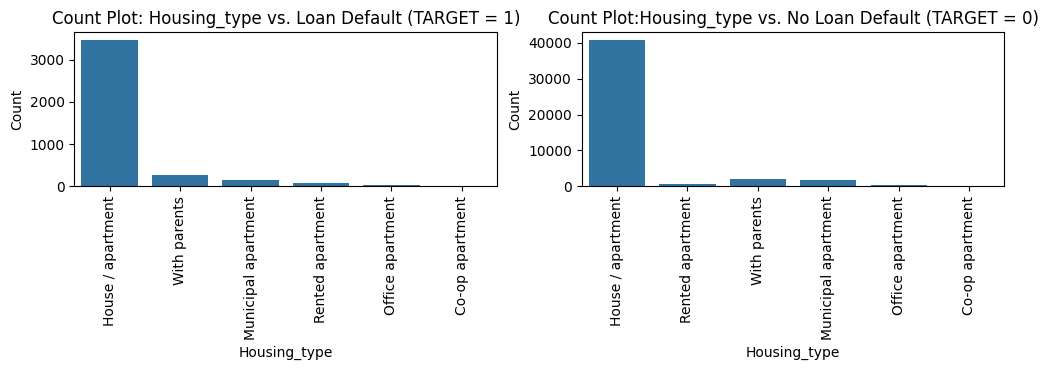

In [ ]:
# Create a subplot with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(12,2))

# Plot for 'TARGET' equal to 1 (loan default)
sns.countplot(data=app_df[app_df['TARGET'] == 1], x='NAME_HOUSING_TYPE', ax=axes[0])
axes[0].set_xlabel('Housing_type')
axes[0].set_ylabel('Count')
axes[0].set_title('Count Plot: Housing_type vs. Loan Default (TARGET = 1)')
axes[0].tick_params(axis='x', rotation=90)

# Plot for 'TARGET' equal to 0 (no loan default)
sns.countplot(data=app_df[app_df['TARGET'] == 0], x='NAME_HOUSING_TYPE', ax=axes[1])
axes[1].set_xlabel('Housing_type')
axes[1].set_ylabel('Count' )
axes[1].set_title('Count Plot:Housing_type vs. No Loan Default (TARGET = 0)')
axes[1].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

<ipython-input-91-c6885414d471>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=app_df[app_df['TARGET'] == 1], x='NAME_EDUCATION_TYPE', ax=axes[0], palette=custom_colors)
<ipython-input-91-c6885414d471>:6: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.countplot(data=app_df[app_df['TARGET'] == 1], x='NAME_EDUCATION_TYPE', ax=axes[0], palette=custom_colors)
<ipython-input-91-c6885414d471>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=app_df[app_df['TARGET'] == 0], x='NAME_EDUCATION_TYPE', ax=axes[1], palette=custom_colors)


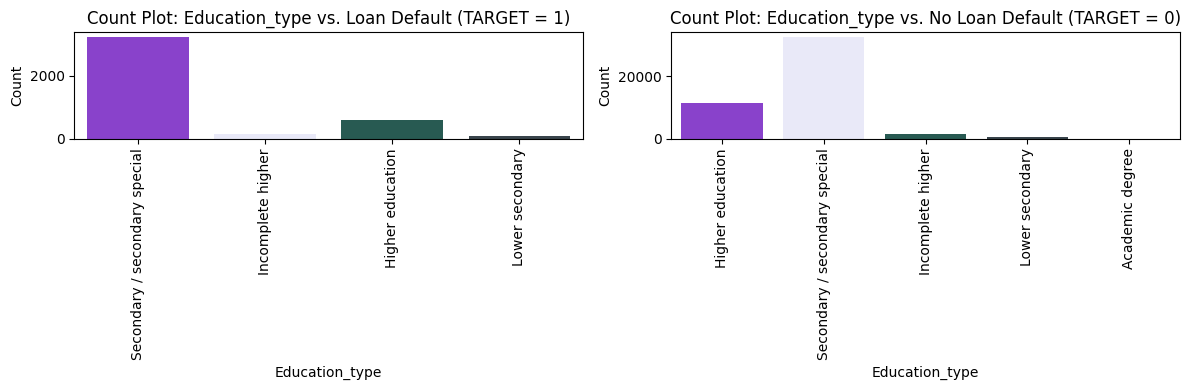

In [ ]:
custom_colors = ["#8A2BE2", "#E6E6FA", "#1F6357", "#36454F", "#AFDCEC"]  # You can customize these colors as needed
# Create a subplot with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Plot for 'TARGET' equal to 1 (loan default)
sns.countplot(data=app_df[app_df['TARGET'] == 1], x='NAME_EDUCATION_TYPE', ax=axes[0], palette=custom_colors)
axes[0].set_xlabel('Education_type')
axes[0].set_ylabel('Count')
axes[0].set_title('Count Plot: Education_type vs. Loan Default (TARGET = 1)')
axes[0].tick_params(axis='x', rotation=90)

# Plot for 'TARGET' equal to 0 (no loan default)
sns.countplot(data=app_df[app_df['TARGET'] == 0], x='NAME_EDUCATION_TYPE', ax=axes[1], palette=custom_colors)
axes[1].set_xlabel('Education_type')
axes[1].set_ylabel('Count' )
axes[1].set_title('Count Plot: Education_type vs. No Loan Default (TARGET = 0)')
axes[1].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()


<ipython-input-92-60e2e09a7bb7>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=app_df[app_df['TARGET'] == 1], x='OCCUPATION_TYPE', ax=axes[0], palette=custom_colors)
<ipython-input-92-60e2e09a7bb7>:8: UserWarning: 
The palette list has fewer values (15) than needed (19) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(data=app_df[app_df['TARGET'] == 1], x='OCCUPATION_TYPE', ax=axes[0], palette=custom_colors)
<ipython-input-92-60e2e09a7bb7>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=app_df[app_df['TARGET'] == 0], x='OCCUPATION_TYPE', ax=axes[1], palette=custom_colors)
<ipython-input-92-60e2e09a7bb7>:15: UserWarning: 
The palette list has fewe

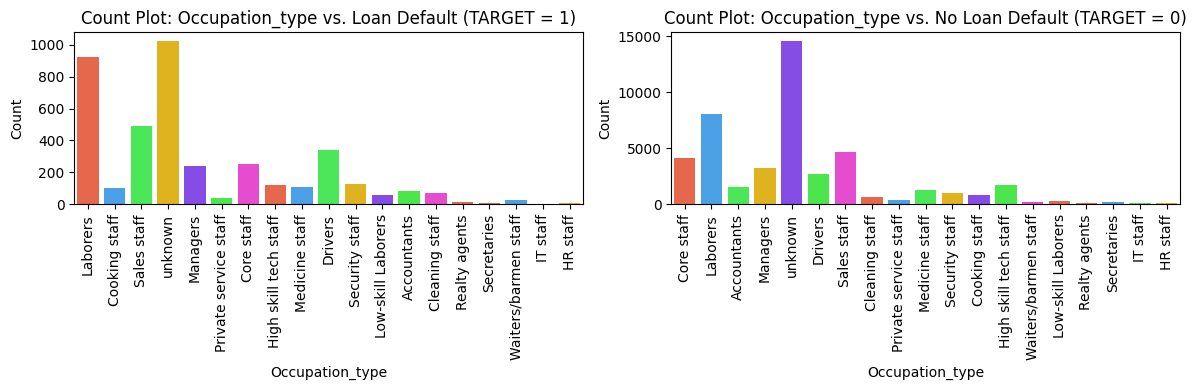

In [ ]:
custom_colors = ["#FF5733", "#33A2FF", "#33FF45", "#FFC300", "#7F33FF",
                 "#33FF33", "#FF33E0", "#FF5733", "#33A2FF", "#33FF45",
                 "#FFC300", "#7F33FF", "#33FF33", "#FF33E0", "#FF5733"]
# Create a subplot with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Plot for 'TARGET' equal to 1 (loan default)
sns.countplot(data=app_df[app_df['TARGET'] == 1], x='OCCUPATION_TYPE', ax=axes[0], palette=custom_colors)
axes[0].set_xlabel('Occupation_type')
axes[0].set_ylabel('Count')
axes[0].set_title('Count Plot: Occupation_type vs. Loan Default (TARGET = 1)')
axes[0].tick_params(axis='x', rotation=90)

# Plot for 'TARGET' equal to 0 (no loan default)
sns.countplot(data=app_df[app_df['TARGET'] == 0], x='OCCUPATION_TYPE', ax=axes[1], palette=custom_colors)
axes[1].set_xlabel('Occupation_type')
axes[1].set_ylabel('Count')
axes[1].set_title('Count Plot: Occupation_type vs. No Loan Default (TARGET = 0)')
axes[1].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()


Chi-square statistic: 116.79271712408944
p-value: 2.5854939959030595e-24


<Figure size 800x600 with 0 Axes>

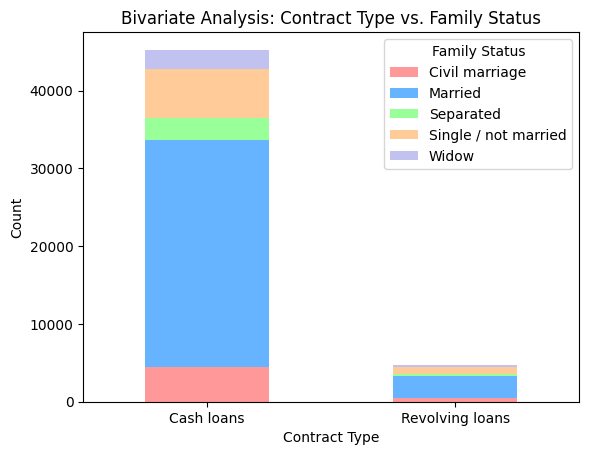

In [ ]:
# Assuming app_df is your DataFrame

# Filter the relevant columns
data = app_df[['NAME_CONTRACT_TYPE', 'NAME_FAMILY_STATUS']]

# Create a contingency table
contingency_table = pd.crosstab(data['NAME_CONTRACT_TYPE'], data['NAME_FAMILY_STATUS'])

# Calculate the chi-square statistic and p-value for the correlation
chi2, p, _, _ = chi2_contingency(contingency_table)

print("Chi-square statistic:", chi2)
print("p-value:", p)

# Define a color palette
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0','#ffb3e6']

# Plot a stacked bar chart with custom colors
plt.figure(figsize=(8, 6))
contingency_table.plot(kind='bar', stacked=True, color=colors)
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.title('Bivariate Analysis: Contract Type vs. Family Status')
plt.xticks(rotation=0)
plt.legend(title='Family Status')
plt.show()

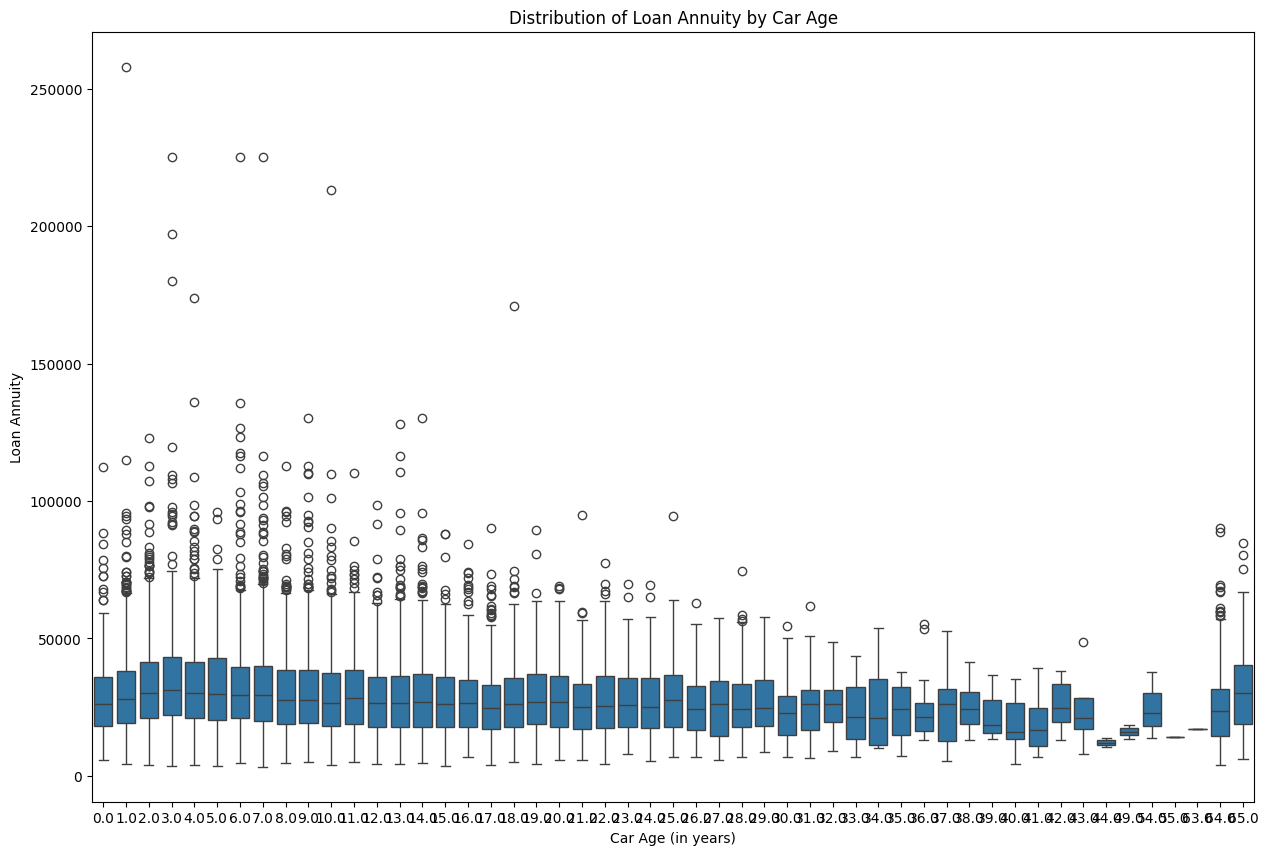

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load the dataset
app_df = pd.read_csv("/content/application_data.csv")

plt.figure(figsize=(15, 10))
sns.boxplot(x='OWN_CAR_AGE', y='AMT_ANNUITY', data=app_df, )
plt.xlabel('Car Age (in years)')
plt.ylabel('Loan Annuity')
plt.title('Distribution of Loan Annuity by Car Age')
plt.show()

<ipython-input-98-5ef6df3268ce>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=app_df, x='NAME_EDUCATION_TYPE', y='AMT_INCOME_TOTAL', ci=None, palette=custom_colors)
<ipython-input-98-5ef6df3268ce>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=app_df, x='NAME_EDUCATION_TYPE', y='AMT_INCOME_TOTAL', ci=None, palette=custom_colors)


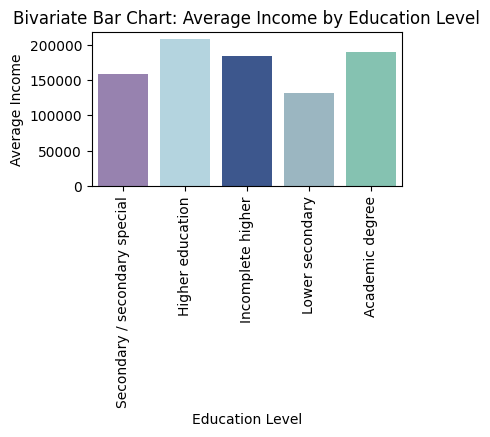

In [ ]:
custom_colors = ["#967BB6", "#ADD8E6", "#2F539B", "#95B9C7", "#7BCCB5"]  # You can customize these colors as needed
# Create a bar chart for 'AMT_INCOME_TOTAL' against 'NAME_EDUCATION_TYPE' with custom colors
plt.figure(figsize=(4,2))
sns.barplot(data=app_df, x='NAME_EDUCATION_TYPE', y='AMT_INCOME_TOTAL', ci=None, palette=custom_colors)
plt.xlabel('Education Level')
plt.ylabel('Average Income')
plt.title('Bivariate Bar Chart: Average Income by Education Level')
plt.xticks(rotation=90)
plt.show()


<ipython-input-99-5f99c6b10c95>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=app_df, x='NAME_CONTRACT_TYPE', y='AMT_CREDIT', inner='quart', palette=custom_palette)


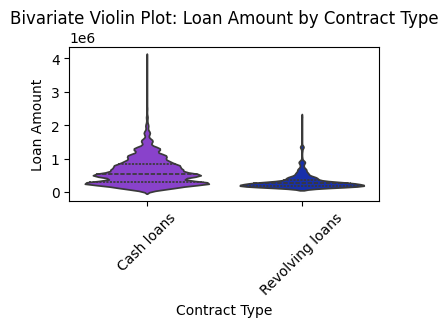

In [ ]:
# Define a custom color palette
custom_palette = ["#8A2BE2", "#0020C2"]  # You can customize these colors as needed
# Create a violin plot for 'AMT_CREDIT' against 'NAME_CONTRACT_TYPE' with custom colors
plt.figure(figsize=(4,2))
sns.violinplot(data=app_df, x='NAME_CONTRACT_TYPE', y='AMT_CREDIT', inner='quart', palette=custom_palette)
plt.xlabel('Contract Type')
plt.ylabel('Loan Amount')
plt.title('Bivariate Violin Plot: Loan Amount by Contract Type')
plt.xticks(rotation=45)
plt.show()



In [ ]:
# Assuming your target variable is named 'TARGET' (1 for payment difficulties, 0 for no difficulties)
target_variable = 'TARGET'
# Select the relevant columns for correlation analysis
selected_columns = ['AMT_CREDIT', 'AMT_GOODS_PRICE', 'AMT_ANNUITY', 'AMT_INCOME_TOTAL', 'DAYS_EMPLOYED', 'DAYS_BIRTH', 'CNT_CHILDREN', 'DAYS_ID_PUBLISH', 'CNT_FAM_MEMBERS', 'OBS_30_CNT_SOCIAL_CIRCLE']
# Split the dataset into two scenarios: payment difficulties (TARGET = 1) and all other cases (TARGET = 0)
payment_difficulties_data = app_df[app_df[target_variable] == 1]
other_cases_data = app_df[app_df[target_variable] == 0]
# Calculate correlations for both scenarios
payment_difficulties_correlations = payment_difficulties_data[selected_columns].corr()
other_cases_correlations = other_cases_data[selected_columns].corr()
# Find the top 10 correlations for payment difficulties
payment_difficulties_top_correlations = payment_difficulties_correlations.unstack().sort_values(ascending=False).drop_duplicates()
payment_difficulties_top_correlations = payment_difficulties_top_correlations[1:11]  # Exclude self-correlations

# Find the top 10 correlations for all other cases
other_cases_top_correlations = other_cases_correlations.unstack().sort_values(ascending=False).drop_duplicates()
other_cases_top_correlations = other_cases_top_correlations[1:11]  # Exclude self-correlations

# Print the top 10 correlations for each scenario
print("Top 10 Correlations for Clients with Payment Difficulties:")
print(payment_difficulties_top_correlations)
print("\nTop 10 Correlations for All Other Cases:")
print(other_cases_top_correlations)


Top 10 Correlations for Clients with Payment Difficulties:
AMT_GOODS_PRICE  AMT_CREDIT         0.982432
CNT_FAM_MEMBERS  CNT_CHILDREN       0.892522
AMT_GOODS_PRICE  AMT_ANNUITY        0.749705
AMT_ANNUITY      AMT_CREDIT         0.749665
CNT_CHILDREN     DAYS_BIRTH         0.249673
DAYS_ID_PUBLISH  DAYS_BIRTH         0.247897
CNT_FAM_MEMBERS  DAYS_BIRTH         0.199141
                 AMT_ANNUITY        0.075838
AMT_CREDIT       CNT_FAM_MEMBERS    0.061249
AMT_GOODS_PRICE  CNT_FAM_MEMBERS    0.055104
dtype: float64

Top 10 Correlations for All Other Cases:
AMT_GOODS_PRICE   AMT_CREDIT         0.987244
CNT_FAM_MEMBERS   CNT_CHILDREN       0.879239
AMT_GOODS_PRICE   AMT_ANNUITY        0.776142
AMT_ANNUITY       AMT_CREDIT         0.770773
AMT_INCOME_TOTAL  AMT_ANNUITY        0.451136
                  AMT_GOODS_PRICE    0.384675
                  AMT_CREDIT         0.377966
CNT_CHILDREN      DAYS_BIRTH         0.335876
CNT_FAM_MEMBERS   DAYS_BIRTH         0.284385
DAYS_ID_PUBLISH   DA

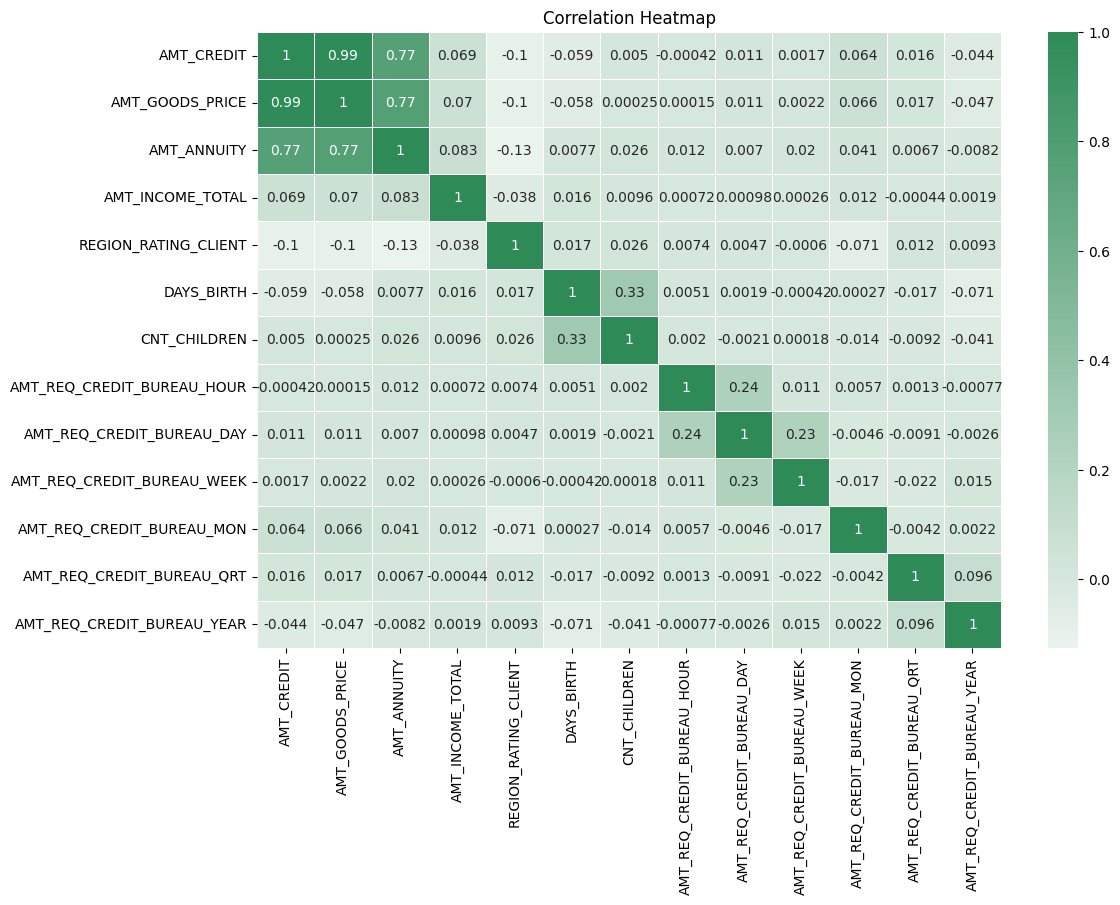

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load the dataset
app_df = pd.read_csv("/content/application_data.csv")

# Select the columns of interest
selected_columns = ['AMT_CREDIT', 'AMT_GOODS_PRICE', 'AMT_ANNUITY', 'AMT_INCOME_TOTAL', 'REGION_RATING_CLIENT',
                    'DAYS_BIRTH', 'CNT_CHILDREN', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
                    'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
                    'AMT_REQ_CREDIT_BUREAU_YEAR']

# Calculate the correlation matrix
correlation_matrix = app_df[selected_columns].corr()

# Define a custom sequential color map
custom_cmap = sns.light_palette("seagreen", as_cmap=True)

# Create a heatmap to visualize the correlations with custom colors
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap=custom_cmap, linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

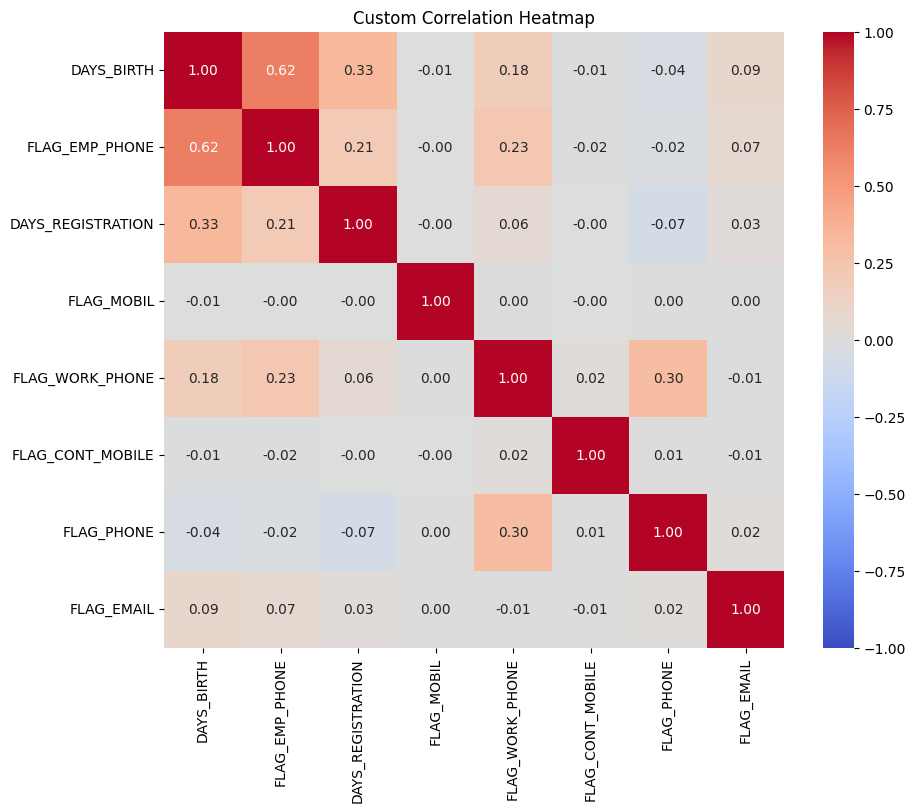

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load the dataset
app_df = pd.read_csv("/content/application_data.csv")

# Select only the numeric columns
numeric_columns = app_df.select_dtypes(include=['float64', 'int64']).columns

# Define the variables of interest that are numeric and exist in the dataset
variables_of_interest = ['DAYS_BIRTH', 'FLAG_EMP_PHONE', 'DAYS_REGISTRATION', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL']

# Filter to ensure that only the variables present in the numeric columns are considered
filtered_variables = [var for var in variables_of_interest if var in numeric_columns]

# Calculate the correlation matrix using the filtered variables
correlation_matrix = app_df[filtered_variables].corr()

# Create a customized heatmap for these variables
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Custom Correlation Heatmap')
plt.show()

In [ ]:
# One-hot encode categorical columns
app_df_encoded = pd.get_dummies(app_df)

# Calculate the correlation matrix for the entire dataset
correlation_matrix = app_df_encoded.corr()

# Filter the dataset based on the specified scenario
scenario_data = app_df_encoded[app_df_encoded[scenario_column_name] == scenario_value]

# Calculate the correlation matrix for the filtered scenario data
correlation_matrix_scenario = scenario_data.corr()
top_n = 10
top_correlations = correlation_matrix_scenario['TARGET'].abs().sort_values(ascending=False)[1:top_n + 1]

print(f"Top {top_n} Correlations for the Scenario ({scenario_column_name} = {scenario_value}):")
print(top_correlations)

Top 10 Correlations for the Scenario (TARGET = 1):
TARGET                       NaN
CNT_CHILDREN                 NaN
AMT_INCOME_TOTAL             NaN
AMT_CREDIT                   NaN
AMT_ANNUITY                  NaN
AMT_GOODS_PRICE              NaN
REGION_POPULATION_RELATIVE   NaN
DAYS_BIRTH                   NaN
DAYS_EMPLOYED                NaN
DAYS_REGISTRATION            NaN
Name: TARGET, dtype: float64


In [ ]:
# Select only numeric columns
numeric_columns = app_df.select_dtypes(include=np.number)

# Calculate the correlation matrix
corr_defaulter = numeric_columns.corr()

# Create a mask to select the upper triangle of the correlation matrix
mask = np.triu(np.ones_like(corr_defaulter, dtype=bool), k=1)

# Unstack the correlation matrix and reset the index
corr_df_defaulter = corr_defaulter.unstack().reset_index()

# Rename the columns
corr_df_defaulter.columns = ['VAR1', 'VAR2', 'Correlation']

# Drop rows where the Correlation column is NaN
corr_df_defaulter.dropna(subset=["Correlation"], inplace=True)

# Sort the DataFrame by the absolute value of the Correlation column in descending order
corr_df_defaulter['Correlation'] = corr_df_defaulter['Correlation'].abs()
corr_df_defaulter.sort_values(by="Correlation", ascending=False, inplace=True)

# Get the top 16 correlations
top_16_corr_defaulter = corr_df_defaulter.head(16)

# Print the top 16 correlations
print(top_16_corr_defaulter)

                             VAR1                         VAR2  Correlation
0                      SK_ID_CURR                   SK_ID_CURR          1.0
107                        TARGET                       TARGET          1.0
3103                 EXT_SOURCE_1                 EXT_SOURCE_1          1.0
3210                 EXT_SOURCE_2                 EXT_SOURCE_2          1.0
3317                 EXT_SOURCE_3                 EXT_SOURCE_3          1.0
3424               APARTMENTS_AVG               APARTMENTS_AVG          1.0
3531             BASEMENTAREA_AVG             BASEMENTAREA_AVG          1.0
3638  YEARS_BEGINEXPLUATATION_AVG  YEARS_BEGINEXPLUATATION_AVG          1.0
3745              YEARS_BUILD_AVG              YEARS_BUILD_AVG          1.0
3852               COMMONAREA_AVG               COMMONAREA_AVG          1.0
3959                ELEVATORS_AVG                ELEVATORS_AVG          1.0
4066                ENTRANCES_AVG                ENTRANCES_AVG          1.0
4173        

In [ ]:
import pandas as pd

# Define the correlation function
def correlation(df):
    """Calculates the correlation matrix for a Pandas DataFrame.

    Args:
      df: A Pandas DataFrame.

    Returns:
      A Pandas DataFrame containing the correlation matrix.
    """
    # Select only numeric columns
    numeric_df = df.select_dtypes(include=['float64', 'int64'])

    # Calculate the correlation matrix
    corr_matrix = numeric_df.corr()

    return corr_matrix

# Load the data
df = pd.read_csv('/content/application_data.csv')

# Calculate the correlation matrix
corr_matrix = correlation(df)

# Print the correlation table
print(corr_matrix)


                              SK_ID_CURR    TARGET  CNT_CHILDREN  \
SK_ID_CURR                      1.000000  0.003295      0.005538   
TARGET                          0.003295  1.000000      0.026364   
CNT_CHILDREN                    0.005538  0.026364      1.000000   
AMT_INCOME_TOTAL               -0.003014  0.010894      0.009589   
AMT_CREDIT                     -0.000732 -0.032428      0.004972   
AMT_ANNUITY                    -0.002084 -0.012399      0.026179   
AMT_GOODS_PRICE                -0.000743 -0.041307      0.000253   
REGION_POPULATION_RELATIVE      0.001979 -0.040799     -0.025556   
DAYS_BIRTH                      0.001324  0.076788      0.329264   
DAYS_EMPLOYED                  -0.004372 -0.040295     -0.239693   
DAYS_REGISTRATION              -0.003709  0.042343      0.181217   
DAYS_ID_PUBLISH                -0.008738  0.046927     -0.032116   
OWN_CAR_AGE                     0.002485  0.039534      0.017437   
FLAG_MOBIL                      0.002863  0.0013

In [ ]:
import pandas as pd

# Read the data
df = pd.read_csv('/content/application_data.csv')

# Select only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
corr_matrix = numeric_df.corr().abs()

# Stack the correlation matrix and sort the values
corr_series = corr_matrix.unstack().sort_values(ascending=False)

# Filter out correlations with the same variable and drop duplicates
corr_series = corr_series[corr_series.index.get_level_values(0) != corr_series.index.get_level_values(1)]
corr_series = corr_series.drop_duplicates()

# Get the top 10 correlations
top_10_corr = corr_series.iloc[:10]

print(top_10_corr)

DAYS_EMPLOYED             FLAG_EMP_PHONE              0.999749
OBS_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE    0.998331
LIVINGAPARTMENTS_MEDI     LIVINGAPARTMENTS_AVG        0.998122
YEARS_BUILD_MEDI          YEARS_BUILD_AVG             0.997768
FLOORSMIN_AVG             FLOORSMIN_MEDI              0.997169
ENTRANCES_MEDI            ENTRANCES_AVG               0.997020
FLOORSMAX_MEDI            FLOORSMAX_AVG               0.996978
ELEVATORS_MEDI            ELEVATORS_AVG               0.996041
APARTMENTS_MEDI           APARTMENTS_AVG              0.995612
NONLIVINGAREA_AVG         NONLIVINGAREA_MEDI          0.995210
dtype: float64


In [ ]:
import pandas as pd

# Load the data
df = pd.read_csv('/content/application_data.csv')

# Function to calculate the correlation matrix for numeric columns
def correlation(df):
    numeric_df = df.select_dtypes(include=['float64', 'int64'])
    corr_matrix = numeric_df.corr()
    return corr_matrix

# Filter data for Target 0 and Target 1
data_target0 = df[df['TARGET'] == 0]
data_target1 = df[df['TARGET'] == 1]

# Calculate the correlation matrix for each scenario
corr_matrix_target0 = correlation(data_target0)
corr_matrix_target1 = correlation(data_target1)

# Function to get top N correlations from a correlation matrix
def get_top_correlations(corr_matrix, N=10):
    unstacked_corr = corr_matrix.abs().unstack()
    sorted_corr = unstacked_corr.sort_values(ascending=False)
    top_corr = sorted_corr[sorted_corr.index.get_level_values(0) != sorted_corr.index.get_level_values(1)]
    top_corr = top_corr.drop_duplicates()
    return top_corr.head(N)

# Get and print the top 10 correlations for each scenario
top_correlations_target0 = get_top_correlations(corr_matrix_target0)
top_correlations_target1 = get_top_correlations(corr_matrix_target1)

print("Top 10 Correlations for Target 0:")
for i, (idx, corr) in enumerate(top_correlations_target0.items(), 1):
    var1, var2 = idx
    print(f"{i}. {var1}\t - {var2}\t: {corr}")

print("\nTop 10 Correlations for Target 1:")
for i, (idx, corr) in enumerate(top_correlations_target1.items(), 1):
    var1, var2 = idx
    print(f"{i}. {var1}\t - {var2}\t: {corr}")

Top 10 Correlations for Target 0:
1. FLAG_EMP_PHONE	 - DAYS_EMPLOYED	: 0.9997395471557757
2. OBS_60_CNT_SOCIAL_CIRCLE	 - OBS_30_CNT_SOCIAL_CIRCLE	: 0.9983553812154778
3. LIVINGAPARTMENTS_AVG	 - LIVINGAPARTMENTS_MEDI	: 0.998073322841423
4. YEARS_BUILD_MEDI	 - YEARS_BUILD_AVG	: 0.9976927089829098
5. FLOORSMIN_AVG	 - FLOORSMIN_MEDI	: 0.9970701013507475
6. ENTRANCES_AVG	 - ENTRANCES_MEDI	: 0.9969380963252225
7. APARTMENTS_AVG	 - APARTMENTS_MEDI	: 0.9969113837396943
8. FLOORSMAX_MEDI	 - FLOORSMAX_AVG	: 0.9968995799849036
9. ELEVATORS_AVG	 - ELEVATORS_MEDI	: 0.9959322311554759
10. NONLIVINGAREA_AVG	 - NONLIVINGAREA_MEDI	: 0.9949241317078528

Top 10 Correlations for Target 1:
1. NONLIVINGAPARTMENTS_AVG	 - NONLIVINGAPARTMENTS_MEDI	: 0.9999541423531655
2. DAYS_EMPLOYED	 - FLAG_EMP_PHONE	: 0.9999012052740813
3. YEARS_BUILD_AVG	 - YEARS_BUILD_MEDI	: 0.9989126251217804
4. LIVINGAPARTMENTS_AVG	 - LIVINGAPARTMENTS_MEDI	: 0.9988375622756523
5. BASEMENTAREA_AVG	 - BASEMENTAREA_MEDI	: 0.998824804865047